<a href="https://colab.research.google.com/github/whyeon92/ESAA_YB/blob/Code_Study/ESAA_HW0325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌2.5 데이터 전처리


머신러닝 알고리즘은 데이터에 기반하고 있기 때문에 어떤 데이터를 입력으로 가지느냐에 따라 결과가 크게 좌우됨(= Garbage in, Garbage out) -> 데이터에 대해 기본적인 처리를 미쳐야 좋은 성능을 보일 수 있음.  
- 결손값(NaN, NULL값은 머신러닝에 적용이 될 수 없음.  
 -> 해당 값들은 해당 피처의 평균 등의 값으로 대체 가능.(그러나 왜곡이 생길 수 있으니 데이터 잘 보고 결정해야함), 만약 특정 피처의 결측값이 너무 많을 경우 그냥 그 피처를 떨구는 게 이득일 수도 있음
- 문자열 또한 입력값으로 허용되지 않음.  
 -> 모든 문자열은 인코딩을 적용해 숫자 형으로 변환시켜야 함.
  - 문자열 피처 -> 카테고리형 피처, 텍스트형 피처(피처 벡터화로 처리 또는 제거, ex. 주민등록 번호, 고객 아이디)

[데이터 인코딩]  
- 레이블 인코딩(Label encoding)  
 :카테고리형 피처를 코드형 숫자 값으로 변환
 - 간단히 말해 문자형으로 되어있는 카테고리형 피처의 레벨 n개를 모두 0~(n-1)의 정수로 바꿔줌
 - `LabelEncoder` 클래스로 구현하고, fit()으로 학습, transform()으로 인코딩 수행하면 됨
 - 피처의 레벨이 많은 경우 LabelEncoder 객체의 classes_ 속성값으로 확인 가능
 - inverse_transform()을 통해 인코딩된 값을 다시 디코딩 가능
 - 레이블 인코딩을 통해 문자열이 일괄적으로 숫자형으로 변환되는데, 이때 숫자의 크고작음으로 인해 머신러닝 알고리즘에서 레벨에 따라 가중치가 더 부여되는 등의 문제가 생길 수 있기 때문에 **선형회귀와 같은 알고리즘엔 적용하면 안됨**. 결정트리는 이런 특성이 반영되지 않으니 상관없음!
   
- 원-핫 인코딩(One-Hot Encoding)  
  : 피처 값의 레벨을 새로운 피처로 추가해 해당 레벨에 해당할 경우 1을 할당, 아니면 0을 할당하는 방식의 인코딩  
  - 따라서 n개의 레벨이 있다면 n개의 새로운 피처가 생성됨(사실 (n-1)개로도 가능함, 회귀의 카테고리형 변수 -> 더미 변수 참고.)
  - `OneHotEncoder()` 클래스로 수행 가능. 그러나 수행 전 레이블 인코더로 문자열을 숫자형으로 변환한 이후에 사용해야 함. fit(), transform() 사용은 위의 레이블인코딩과 같음.
  - 위의 클래스 외에도 판다스의get_dummies()로 숫자형 변환 없이 바로 변환이 가능


[피처 스케일링과 정규화]  
 피처 스케일링: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 과정  
  -> 표쥰화, 정규화
  - 표준화(Standardization)
   - ${x_inew} \ =\  {{x_i\ -\ mean(x)} \over stdev(x) }$  과 같이 식으로 표현 가능 (stdev: 피처의 표준편차)
   - 간단히 말해 N(0, 1)의 분포를 따르는 데이터로 피처를 변환한다는 것.
   - `StandardScaler()`로 적용 가능
   - SVM, 선형 회귀, 로지스틱 회귀 등이 가우시안 분포를 가진 것을 가정하고 구현되어 해당 알고리즘을 사용할 때 중요하게 사용됨.

  - 정규화(Normalization)
   - 모든 피처의 값을 최소 0~ 최대 1의 값으로 변환.
   - $x_inew \ =\  {{x_i\ -\ min(x)} \over {max(x) \ - \ min(x)}}$
   - 일반적인 정규화는 위와 같지만 사이킷런의 정규화 모듈은 선형대수의 개념으로 개별 벡터의 크기를 맞추기 위해 변환하는 것, 따라서 개별 벡터를 모든 피처 벡터의 크기로 나눠준다. 따라서 3개의 벡터 x, y, z에 대해 진행하면 다음과 같은 식이 적용됨.
   ${x_inew} \ = \ { x_i \over {\sqrt{ x_i^2 + y_i^2 + z_i^2 }}}$
   - `MinMaxScaler()`로 수행 가능
   - MinMaxScaler로 적용하면 음수가 없다면 0에서 1 사이의 값으로, 음수가 있다면 -1에서 1 사이의 값으로 만들어줌

[학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점]  
학습 데이터 세트로 fit한 스케일러를 그대로 테스트 데이터에 사용해야함, 안그러고 테스트 데이터 세트에도 또 스케일러 적용하면 서로 기준이 달라져서 같은 값이 스케일러 적용 후 다른 값으로 나올 수 있음.   
**꼭 스케일러 적용 시엔 학습 데이터로 학습시킨 스케일러 그대로 검증 데이터에 사용해야함!**  
책에선 전체 데이터에 스케일링 적용 후에 학습/검증 데이터를 분리하는 방법을 추천~하지만... 가지고 있는 데이터에 대해 과적합을 막으려면 그냥 학습데이터로 스케일러 fit시키고 그걸 다 학습/검증 데이터에 사용하는 걸 추천한다고도 배움.~




In [1]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 반환값: ', labels)

인코딩 반환값:  [0 1 4 5 3 3 2 2]


In [2]:
print('인코딩 클래스: ', encoder.classes_)
#결과 보면 입력된 레벨 순서가 아니라 그냥 가나다순으로 레이블 순서가 결정되는 듯

인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [4]:
print('디코딩 원본값: ', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))
#왜하필 [4, 5, 2, 0, 1, 1, 3, 3]를 넣었는진 모르겠지만,
#우선 결과로는 4는 뭘 인코딩 한건지, 5는 뭘 인코딩해서 나온건지 이런 결과를 쭈루룩 보여줌

디코딩 원본값:  ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [6]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

#먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환합니다.
encoder = LabelEncoder()
encoder.fit(items)
#labels에 items 레이블 인코딩 변환 결과 저장
labels = encoder.transform(items)
#2차원 데이터로 변환합니다. -> 8*1 행렬
labels = labels.reshape(-1, 1)

#원-핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [7]:
import pandas as pd

df = pd.DataFrame({'item': ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [8]:
from sklearn.datasets import load_iris
import pandas as pd
#붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\n feature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

 feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [9]:
from sklearn.preprocessing import StandardScaler

#StandardScaler 객체 생성
scaler = StandardScaler()
#StandardScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\n feature 들의 분산 값')
print(iris_df_scaled.var())
#평균은 0, 분산은 1에 가까워짐

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

 feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [12]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
scaler = MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature 들의 최소값')
print(iris_df_scaled.min())
print('\n feature 들의 최대값')
print(iris_df_scaled.max())
#최대는 1, 최소는 0이 됨.

feature 들의 최소값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

 feature 들의 최대값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [13]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
#Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

In [16]:
#MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

#fit() 하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

#1/10 scale로 train_array 데이터 변환함. 원본 10->1로 변환됨
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터: ', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터: ', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터:  [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [17]:
#MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

#1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환
test_scaled = scaler.transform(test_array)

#test_array의 scale 변환 출력
print('원본 test_array 데이터: ', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터: ', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터:  [0 1 2 3 4 5]
Scale된 test_array 데이터:  [0.  0.2 0.4 0.6 0.8 1. ]


In [19]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터: ', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터: ', np.round(train_scaled.reshape(-1), 2))

#test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함
test_scaled = scaler.transform(test_array)
print('\n 원본 test_array 데이터: ', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터: ', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터:  [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

 원본 test_array 데이터:  [0 1 2 3 4 5]
Scale된 test_array 데이터:  [0.  0.1 0.2 0.3 0.4 0.5]


# 📌2.6 사이킷런으로 수행하는 타이타닉 생존자 예측


해당 소단원은 개념보다 개념 적용 부분이기 때문에 별다른 요약 정리 없이 중간중간 코드 흐름 설명을 주석으로 추가함.

In [20]:
#구글 코랩 환경 사용으로 드라이브 마운트 및 디렉터리 설정
from google.colab import drive
drive.mount('/content/gdrive/')

path = "/content/gdrive/My Drive/ESAAData/"

Mounted at /content/gdrive/


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv(path + 'titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [22]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [24]:
#위에서 확인한 결측치 떼우기
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)  #평균 나이로 채움
titanic_df['Cabin'].fillna('N', inplace = True)  #'N'으로 채움 (object라서 그런듯)
titanic_df['Embarked'].fillna('N', inplace = True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())
#titanic_df.isnull.sum() -> 각 피처별 Null 개수
#titanic_df.isnull.sum().sum() -> 전체 데이터 프레임의 Null 개수

데이터 세트 Null 값 개수 0


In [25]:
print('Sex 값 분포: \n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포: \n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포: \n', titanic_df['Embarked'].value_counts())

Sex 값 분포: 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포: 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [26]:
#위의 결과를 보면 Cabin의 경우 N이 가장 많은 건이고,
#C23 C25 C27처럼 여러 Cabin이 하나에 표기된건도 있음 -> 선실 등급인 가장 앞 단어만 뽑아내 사용
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [27]:
#성별에 따른 생존자 수 비교
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

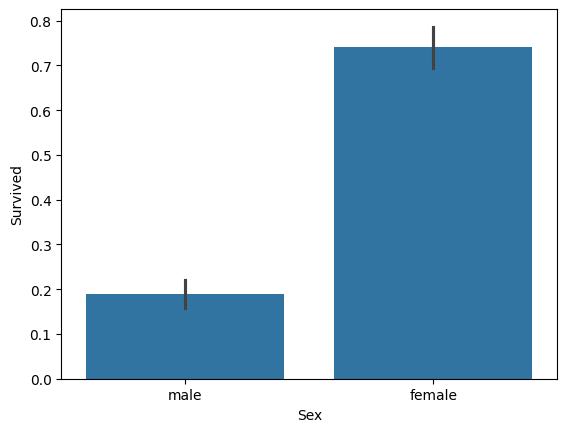

In [28]:
#위의 결과를 시본 그래프로 시각화
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

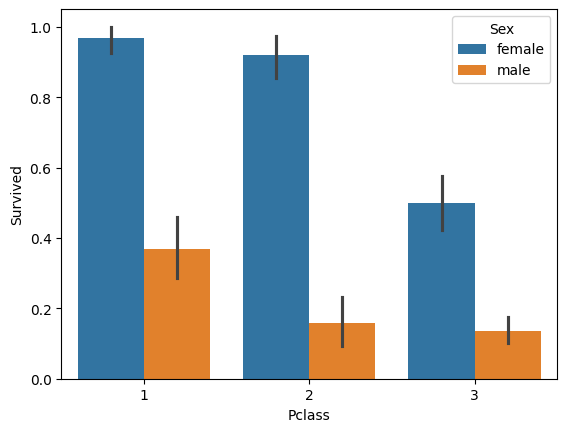

In [29]:
#객실 등급도 포함해서 시각화
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

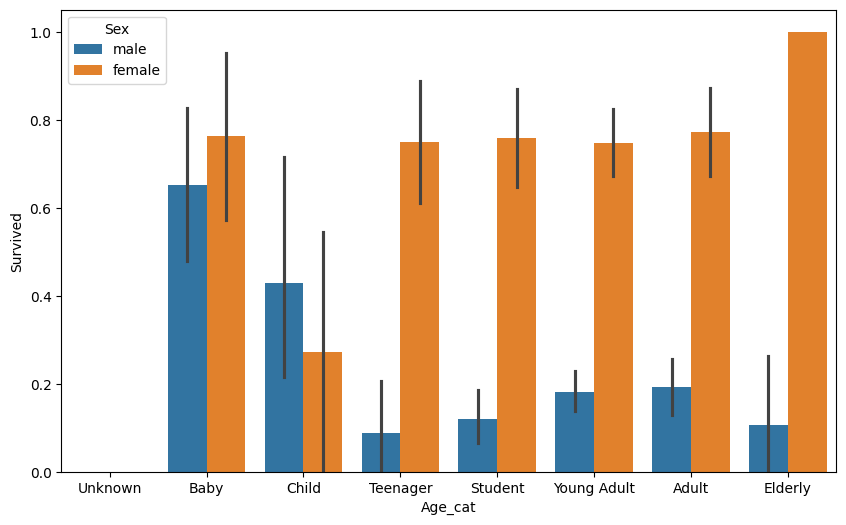

In [30]:
#입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용
def get_category(age):
  cat = ''  #비어있는 문자열 생성
  if age <= -1: cat = 'Unknown'
  elif age <= 5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else: cat = 'Elderly'

  return cat

#막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize = (10, 6))

#x축이 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

#lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
#get_category(X)는 입력값으로 'Age'칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis = 1, inplace = True)  #향후 분석에 age 카테고리는 사용하지 않을 것이에 삭제

In [31]:
from sklearn import preprocessing
#encode_features 함수를 생성해 한번에 카테고리형 피처를 레이블 인코딩
def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [33]:
#Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace = True)
  df['Cabin'].fillna('N', inplace = True)
  df['Embarked'].fillna('N', inplace = True)
  df['Fare'].fillna(0, inplace = True)  #숫자형이라서 결측값은 0으로 변환
  return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
  return df

#레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [34]:
#원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 호충
titanic_df = pd.read_csv(path + 'titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

X_titanic_df = transform_features(X_titanic_df)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

In [36]:
#결정트리, 로지스틱회귀, 랜덤포레스트를 통해 분류 성능 비교
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, 랜덤포레스트, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(  
  

이게 왜 뜨나 했는데 max_iter까지 최대치로 학습했으나 아직 정답에 수렴하지 못한 상태로 max_iter값을 늘려주거나 데이터를 조정하면  해결된다고 함.  
출처: https://www.inflearn.com/questions/33635/20-%EB%89%B4%EC%8A%A4%EA%B7%B8%EB%A3%B9-%EB%B6%84%EB%A5%98-%EA%B0%95%EC%9D%98-%EC%A7%88%EB%AC%B8%EC%9E%85%EB%8B%88%EB%8B%A4

In [46]:
#그래서 max_iter를 디폴트 값인 100보다 크게 만들어서 적용시켜봄
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
lr_clf = LogisticRegression(max_iter = 300)
#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
#어차피 max_iter가 100이든 300이든 결과 정확도는 같은데 왜 저런 안내문을 주는지에 대해선 모르겠음.

LogisticRegression 정확도: 0.8492


In [37]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
  #폴드 세트가 5개인 KFold 객체 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
  kfold = KFold(n_splits = folds)
  scores = []

  #KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    #kfold.split -> Generate indices to split data into training and test set.
    #출처: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
    #split 메소드로 각 폴트의 학습/검증 데이터 인덱스 반환
    #X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    #Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

  #5개 fold에서의 평균 정확도 계산
  mean_score = np.mean(scores)
  print('평균 정확도: {0:.4f}'.format(mean_score))

#exec_kfold 호출
exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [40]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2, 3, 5, 10],
              'min_samples_split' : [2, 3, 5], 'min_samples_leaf' : [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터: ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_
#best_dclf에 최적 하이퍼 파라미터로 학습시킨 결정트리 저장

#GridSeachCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


# 📌2.7 정리

사이킷런을 통해 다음과 같은 작업이 가능하다
- 데이터의 학습/테스트 데이터 분리
- 모델 학습 및 예측
- 데이터 전처리 작업
 - 결측치 처리
 - 정규화, 표준화
- 교차 검증
 - cross_val_score
 - KFold
 - StratifiedKFold
 - GridSearchCV (하이퍼 파라미터 튜닝)